# Impacts of Dams on Downstream Delta Dynamics 
## Case study of Wax Lake Delta

This notebook is a lesson on how river damming impacts sediment characteristics and river delta construction. 

Deltas provide instrumental ecosystem values and services (Day et al., 2007b; Chen and Saito, 2001), serving as hubs for transportation, commercial fisheries, and agriculture land use. The demand on coastal resources has resulted in stress and degradation in many deltaic systems, such as the Mississippi River delta, which has lost one third of its natural wetlands since European settlement (Day et al. 2000). With half a billion people living on or near deltas and 80% of these deltas classified as sediment-starved (Edmonds et al., 2020), it is important to understand how upstream dynamics impact downstream deltaic landscapes.

Upstream damming is designed to limit large-scale channel avulsions (Chen et al., 2001), decrease flooding impacts, provide hydroelectric power, and create basins for water storage which have become part of the global effort to decrease the adverse effects of climate change. Dams alter the hydrology by changing the timing, magnitude, and amount of flow through the river (Hanasaki, 2006), which can adversely impact the sediment patterns downstream. Upstream damming reduces and/or changes sediment inputs, disallowing sediment from counteracting subsidence and increased sea-level rise (Goisan et al., 2014). Along the upper Mississippi River, there are twenty-nine navigation dams (Wilcox et al., 2004). These dams have contributed to the non-uniform discharge on the Wax Lake Delta (Hiatt & Passalacqua, 2015).

<center>
    <img src="dams_mississippi.png" style="width:500px"/>
</center>

The use of dams along the Mississippi river has caused a reduction in sediment, which is a major driver of land loss (Paola et al., 2011). While most of the Louisiana coast is experiencing wetland loss, __the Wax Lake Delta (WLD)__, built as a flood control diversion, is one of two locations experiencing a period of growth since its construction in 1941 (Couvillion, et al., 2011). WLD growth significantly increased after flooding in the early 1970’s, consequently causing silt and sand wedge to form with many bifurcated channels and sandy islands (Van Heerden and Roberts, 1980; Roberts et al., 1980). Wax Lake Delta was constructed to divert one-third of the Mississippi flows to Atchafalaya Bay, although studies have shown it has carried as much as 46% of flows (Allison et al., 2012). Upstream damming has caused the Mississippi River's sediment load to decrease as much as 50% (Blum and Roberts, 2009).

<figure>
<center>
  <img width="400" height="300" src="WLD_gif_fast.gif">
</center>
<figcaption align = "center"><b></b></figcaption>
<figure>Wax Lake Delta timelapse from  1984 to 2022

## Part 1: Characterizing Streamflow

Streamflow data allows us to analyze the relationship between water discharge, intermittency factor (IF), and geomorphic modifications (i.e., deposition and/or erosion). We will explore these in the following steps.

The United States Geological Survey (USGS) has a streamgage ~13 km upstream of the apex of the WLD (USGS [07381590](https://waterdata.usgs.gov/nwis/inventory?agency_code=USGS&site_no=07381590), location marked in figure below). 

<center>
    <img src="WLD.png" style="width:600px"/>
</center>


To optimize the data retrieval process, we will use a python package called [dataretrieval](https://github.com/USGS-python/dataretrieval) that will download streamflow data from the USGS site. 

First, we will import the appropriate python packages, including dataretrieval.

In [1]:
##import python packages

#dataretrieval for USGS streamflow data
import dataretrieval.nwis as nwis

#data saving and manipulation
import pandas as pd
import numpy as np

#data plotting and visualization
from matplotlib import pyplot as plt
import seaborn as sns

Using the dataretrieval package, we will retrieve the USGS streamflow data of all the available water discharge records from 06/01/1986 to 09/30/2015

In [2]:
#set USGS site number
site = '07381590'

#get instantaneous values (iv) for water discharge (this dataset is saved into a panda's dataframe)
df = nwis.get_record(sites=site, service='dv', start='1986-06-01', end='2015-09-30')

In [3]:
# We are interested in analyzing the discharge rate of each date

# set the dates into a column 
df['date'] = df.index

### Flow Frequency Curve:
After downloading the streamflow data, we will compute a flow frequency curve for the WLD. Flow frequency analysis helps hydrologists determine flood water discharges corresponding to specific return periods or probabilities along a river/delta. For example, a flood water discharge with a 10-year return period indicates that this discharge will occur once every ten years or has a 10% chance to occur for any given year. You can visit this [link](https://serc.carleton.edu/hydromodules/steps/168500.html) for a detailed explanation.

Flow frequency analysis assist in analyzing surface processes, in which geomorphologists found that surface processes are most active during flood conditions (Wolman and Miller, 1960). This means that the most amount of change in a landscape typically occurs under flood conditions. It is found that flood water discharge with a 1.5-year return period - which often corresponds to bankfull conditions - is generally considered the flow condition that produces the most amount of geomorphological changes (e.g., rapid movement of sediment) in river and delta systems. Under this flow condition, water surface elevation equals the levee elevation of a river/delta (Wolman and Miller, 1960); discharge herein is referred as the bankfull water discharge (Q<sub>bf</sub>) as dipicted in the schematic below. 
<figure>
<center>
  <img width="400" height="200" src="bankful flow.png">
</center>
<figcaption align = "center"><b></b></figcaption>
<figure>
    Schematic of bankfull flow conditions in a river/delta channel: B<sub>bf</sub> - bankfull channel width, H - channel depth, H<sub>bf</sub> - bankfull channel depth, Q<sub>bf</sub> - bankfull water discharge

Now, lets compute the flow frequency curve

In [4]:
#convert water discharge from ft^3/s to m^3/s
df['q'] = df['00060_Mean']*0.0283168

#isolate year from dates
df['yr'] = pd.DatetimeIndex(df['date']).year

#find the maximum water discharge for a given year 
q_flood = np.round(df.groupby('yr')['q'].agg({np.nanmax}))

#find the corresponding date that the flood water discharge occurred
t_flood = df.groupby('yr')['q'].idxmax()

#sort flood water discharge
q_flood_sort = -np.sort(-q_flood['nanmax'])

#rank flood water discharge
rank_flood = np.arange(1, len(q_flood)+1)

#calculate return period
T = (len(q_flood)+1)/rank_flood

#set characteristics return period
return_period = 1.5

#determine the flow water discharge at the characteristics return period, i.e. bankfull water discharge
q_bf = np.interp(return_period, np.flip(T), np.flip(q_flood_sort))

We can visualize the analysis results using pyplot from matplotlib

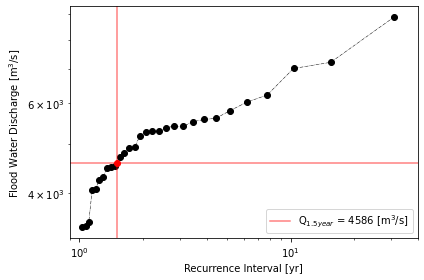

In [5]:
#plot the flood frequency curve
plt.loglog(T, q_flood_sort, '-.ko', linewidth = 0.5)
plt.plot(return_period, q_bf, 'ro')
plt.axhline(y = q_bf, color = 'r', linestyle = '-', alpha=0.5, 
            label= 'Q$_{' + str(return_period) + ' year}$ = ' + str(round(q_bf)) +' [m$^3$/s]')
plt.axvline(x = return_period, color = 'r', linestyle = '-', alpha=0.5)
plt.ylabel('Flood Water Discharge [m$^3$/s]')
plt.xlabel('Recurrence Interval [yr]' )
plt.tight_layout()
# plt.xlim([0.5, 110])
plt.xlim([0.9,40])
plt.legend()
plt.show()

We have determined that the WLD's bankfull water discharge at Q<sub>1.5</sub> is 4586 [m<sup>3</sup>/s]. The next step is to analyze the number of days in a year that the flow exceeds this value.  

We can formally define this information as the Intermittency Factor (If) by finding the fraction of days for a given year when the river is in flood. Knowing this information will tell us how long the delta is geomorphically active in a given year. 

Let us start by visualizing the streamflow data and its relation to our calculated bankfull water discharge (i.e., 1.5-year return flood).

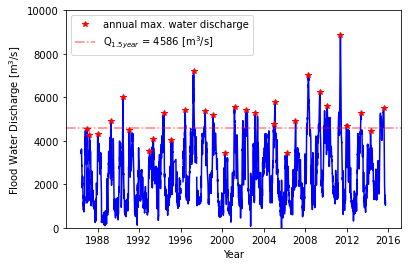

In [6]:
#plot streamflow data
plt.plot(df['date'], df['q'], 'b')
plt.plot(t_flood, q_flood, 'r*', label = 'annual max. water discharge')
plt.axhline(y = q_bf, color = 'r', linestyle = '-.', alpha=0.5, 
            label= 'Q$_{' + str(return_period) + ' year}$ = ' + str(round(q_bf)) +' [m$^3$/s]')
plt.xlabel('Year')
plt.ylabel('Flood Water Discharge [m$^3$/s]')
plt.ylim([0 ,1e4])
plt.legend()
plt.show()

This graph represents:
* <font color=blue>Blue line:</font> The hydrograph of WLD (i.e. the compilation of daily discharge over time)
* <font color=red>* Red stars:</font> The maximum discharge per year
* <font color=red>- Dashed red line:</font> The Bankful water discharge cutoff

We now want to calculate the number of days above the bankfull water discharge (i.e. number of days above the dashed red line)

In [7]:
#find number of days that water discharge is greater than or equal to the bankfull water discharge
df['qr'] = df['q']/q_bf
t_abf = df.groupby('yr')['qr'].apply(lambda x: x[x >= 1].count())

#calculate intermittency factor
If = t_abf/365.25

#unique year
yr_uni = np.unique(df['yr'])

Let's visualize the Intermittency Factor (IF)

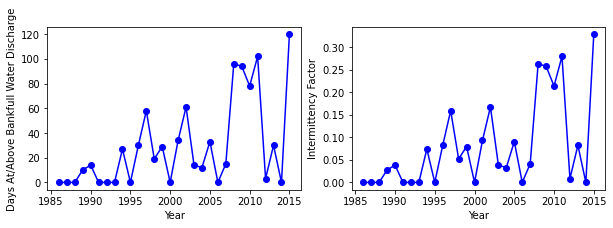

In [8]:
#visualize results
plt.figure(figsize = [10,3])

#subplot the number of days above bankful water discharge
plt.subplot(1,2,1)
plt.plot(yr_uni, t_abf, '-bo')
plt.ylabel('Days At/Above Bankfull Water Discharge')
plt.xlabel('Year')

#subplot the intermittency factor
plt.subplot(1,2,2)
plt.plot(yr_uni, If, '-bo')
plt.ylabel('Intermittency Factor')
plt.xlabel('Year');

### <font color=purple>__Observations and comments:__</font> 
How does the intermittency factor (IF) change over time? What factors can contribute to such changes? 

For modeling purposes, we have to pick a single value for the Intermittency Factor (IF). This value is typically the mean or median. 

We can determine this value through a Intermittency Factor histogram count.

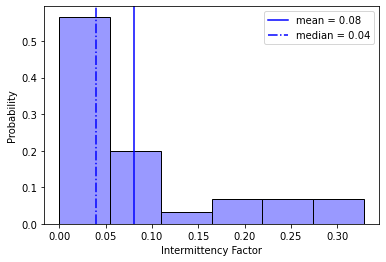

Average Intermittency Factor is 0.08; which equals 29.3 days
Median Intermittency Factor is 0.04; which equals 14.5 days


In [9]:
#plot histogram of IF
sns.histplot(x=If,stat='probability', color = 'b', alpha = 0.4)
plt.axvline(x = If.mean() , color = 'b', linestyle = '-',  label = 'mean = ' + str(np.round(If.mean(), 3)))
plt.axvline(x = If.median() , color = 'b', linestyle = '-.', label = 'median = ' + str(np.round(If.median(), 3)))
plt.xlabel('Intermittency Factor')
plt.rcParams["patch.force_edgecolor"] = False
plt.legend()
plt.show()

#print values
print('Average Intermittency Factor is', str(round(If.mean(), 3))+'; which equals', (If.mean()*365.25), 'days')
print('Median Intermittency Factor is', str(round(If.median(), 3))+'; which equals', (If.median()*365.25), 'days')


### <font color=purple>__Observations and comments:__</font> 
* Are values of IF normally distributed in WLD? 
* How different is the mean and median IF values? 
* What are underlying causes of these difference? 
* Which value is more appropriate to use?

For the purpose of this lab,  we will use the mean value (IF = 0.08). This value will be incorporated in the DeltaRCM model, which we will explore in the upcoming steps!

## Part 2: Modelling Delta Dynamics with DeltaRCM

## DeltaRCM Overview

Numerical models are mathematical tools used to simulate real world systems like deltas. They help us experiment with changes to physical conditions, and  allow us to capture the influence they have on a system's dynamics. In this case, we will study how the loss of sediment supply or a change in sediment characteristics induced by a dam will impact how fast a delta grows (aggrades and/or progrades) and changes to its morphology.

Historically, highly complex models which capture the processes of fluid motion along with sediment transport and deposition have been necessary to simulate deltas. However recently, an alternative approach called reduced complexity modeling, wherein the physical equations are simplified into several simple rules, was developed for delta simulation. This model is called the delta reduced complexity model (DeltaRCM). DeltaRCM functions by probabilistically routing parcels of water and sediment into an open basin based on local water slopes. Sediment is deposited or eroded based on a simplified transport relation which accounts for water velocity. These simple rules are able to construct realistic looking deltas. __For a full description of the model, you can refer to Liang et al., (2015a; 2015b)__

[pyDeltaRCM](https://deltarcm.org/pyDeltaRCM/index.html) is a Python implementation of DeltaRCM with a Basic Model Interface, which makes it easy to install and use. We will use it in the remainder of this lesson. 

### <font color=purple>__Question:__</font> 
From a modeling perspective, what are the advantages and disadvantages of a simple rules based approach to modeling delta formation compared with fully resolving sediment and water transport? 

## Experimentation Parameters

__In this exercise, we will test how dam configurations may change sediment characteristics, including an earthen dam without a sluice gate and a dam with a sluice gate.__

<figure>
<center>
  <img width="800" height="700" src="TypesOfDams.jpg">
</center>
<figcaption align = "center"><b></b></figcaption>
<figure>

Earthen dams are also known as embankment dams and consist of a sloped structure typically made of compacted soils or rock. These are often lined with plastic to prevent seepage which can lead to dam failure. Earthen dams can lead to significant sediment trapping, which fills the upstream reservoir and decreases dam capacity. To address this, sluice gates which release sediment, in particular heavier bedload material, are often installed. Sluice gates can increase the lifespan of the reservoir by preventing this sedimentation. We will explore several idealized scenarios corresponding to various installation and real world examples. 

The model will be in a 20 km wide and 15 km long domain representing the WLD. Note that pyDeltaRCM is a stochastic model so the example models shown below will be similar, but not identical, to the deltas you will create using the same input file. There are several parameters in DeltaRCM related to sediment characteristics; in this exercise we are changing the total sediment concentration (C<sub>0</sub>) and the fraction of bedload or sand (F<sub>s</sub>). The baseline values used in the table below are representative of the larger Mississippi River Delta system (Nittrouer et al., 2012; Shaw et al., 2013; Moodie and Passalacqua, 2021). For a full list of variable parameters, you can read the [documentation](https://deltarcm.org/pyDeltaRCM/reference/model/yaml_defaults.html) and see the default [parameters](https://deltarcm.org/pyDeltaRCM/_autosummary/pyDeltaRCM.model.DeltaModel.html).

<figure>
<center>
  <img width="800" height="600" src="ModelRunsTable.jpg">
</center>
<figcaption align = "center"><b></b></figcaption>
<figure>

Each of these parameter sets (or scenarios) represents a possible impact of dam construction. 
* __Baseline:__ this is the initial, undammed scenario with sand accounting for 24% of total sediment load (and mud making up the remaining 76%). Using Q<sub>bf</sub> = 4586 m<sup>3</sup>/s (review the Streamflow section if you need to!), the total sediment flux is 1376 m<sup>3</sup>/s (30% of the water discharge, or C<sub>0</sub> = 0.3). 
* __Experiment A:__ represents dam construction that does not impact total sediment discharge but does reduce the amount of sand that is transported downstream. This kind of scenario could arise if the dam has a sluice gate that allows some water and sediment to pass through the dam while storing the coarser sand. In this example, mud accounts for 88% of the sediment that builds the delta and sand is only 12% of the incoming sediment (F<sub>s</sub> = 0.12).
* __Experiment B:__ represents a dam that removes all sand from the system (F<sub>s</sub> = 0) but does not change the total sediment concentration (C<sub>0</sub> = 0.15). Only the fine mud reaches the basin and builds the delta. This scenario could arise from a modern dam that has a high sluice gate so that all sand is trapped upstream of the dam.
* __Experiment C:__ reduces the overall sediment concentration by 50% (C<sub>0</sub> = 0.15) but has the same sand and mud fractions as the baseline (F<sub>s</sub> = 0.24). This scenario could arise when scour downstream of a dam erodes and mobilizes sand from the riverbed, resulting in a lower sediment concentration but similar upstream and downstream sand fractions.
* __Experiment D:__ like Experiment A, is also a dam that stores some sand upstream (F<sub>s</sub> = 0.12). However, the total amount of sediment reaching the basin is reduced by 50% (C<sub>0</sub> = 0.15). This scenario could represent a modern dam with a sluice gate that is partially opened, such that both sand and mud pass through the dam but the overall sediment supply decreases. 
* __Experiment E:__ represents a system where all sand is stored upstream of the dam and the resulting delta is only composed of mud (F<sub>s</sub> = 0). As in Experiment D, the total sediment supply is also 50% lower than the initial condition. 

Each experiment runs for __XXXX__ years in a domain that is 20 km wide and 15 km long, so the resulting deltas are overall similar in size to the modern day WLD. Note that pyDeltaRCM is a stochastic model so the example models shown below will be similar, but not identical, to the deltas you could create using the same input file.


### <font color=purple>__Question:__</font> 
Before running the models, Which of the damming scenarios do you think will have the biggest impact on the shape of the delta that forms (A - E)?

## DeltaRCM Model Code

### <font color=red>Do not run this step</font>
__The DeltaRCM code seems short and simple, but it is a lengthy iterative process that takes hours to run.__

Using the provided __.YAML__ configuraiton file, you can run the code below at a later time. For the sake of this lab, output results are provided to you as __.NetCDF__ files. 

In [ ]:
# #import necessary packages
# import pyDeltaRCM
# import time
# import matplotlib.pyplot as plt
# import netCDF4

# #set delta model... parameters are set from the configuration .YAML file, which can be adjusted for different case scenarios
# default_delta = pyDeltaRCM.DeltaModel(input_file='WLD-configuration.yaml')

# #model start time
# t1 = time.time()

# #model timestep as a forloop
# for _ in range(0, 5000):
#     default_delta.update()
# default_delta.finalize()

# #model end time
# t2 = time.time() 

# #total model runtime
# tfinal = t2- t1
# print ('Total model runtime =', tfinal)


### <font color=green>Follow through this step</font>
Let's read the .NetCDF results as datasets. The data is saved as a matrix: a spatial representation of elevation and velocity

In [10]:
#import necessary packages
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

#read NetCDF files into datasets
JA = netCDF4.Dataset('JA.nc') #676
JD = netCDF4.Dataset('JD.nc') #676
KT = netCDF4.Dataset('KT.nc') #592
LV = netCDF4.Dataset('LV.nc') #676
TD = netCDF4.Dataset('TD.nc') #592
Extra = netCDF4.Dataset('DeltaC_F024_C015.nc') #592

We can view the different variables that are saved in each NetCDF file by using the .keys() command

In [11]:
#view variables saved in the files:
print ('Variables in each file:',JA.variables.keys())

Variables in each file: dict_keys(['time', 'x', 'y', 'eta', 'depth', 'discharge', 'velocity', 'sedflux', 'sandfrac', 'discharge_x', 'discharge_y'])


In [12]:
#retrieve depth of each delta ('eta')
JA_eta = np.asarray(JA.variables['eta'])
JD_eta = np.asarray(JD.variables['eta'])
KT_eta = np.asarray(KT.variables['eta'])
LV_eta = np.asarray(LV.variables['eta'])
TD_eta = np.asarray(TD.variables['eta'])
Extra_eta = np.asarray(Extra.variables['eta'])

#retrieve velocity of each delta ('velocity')
JA_velocity = np.asarray(JA.variables['velocity'])
JD_velocity = np.asarray(JD.variables['velocity'])
KT_velocity = np.asarray(KT.variables['velocity'])
LV_velocity = np.asarray(LV.variables['velocity'])
TD_velocity = np.asarray(TD.variables['velocity'])
Extra_velocity = np.asarray(Extra.variables['velocity'])

Now we can visualize the results

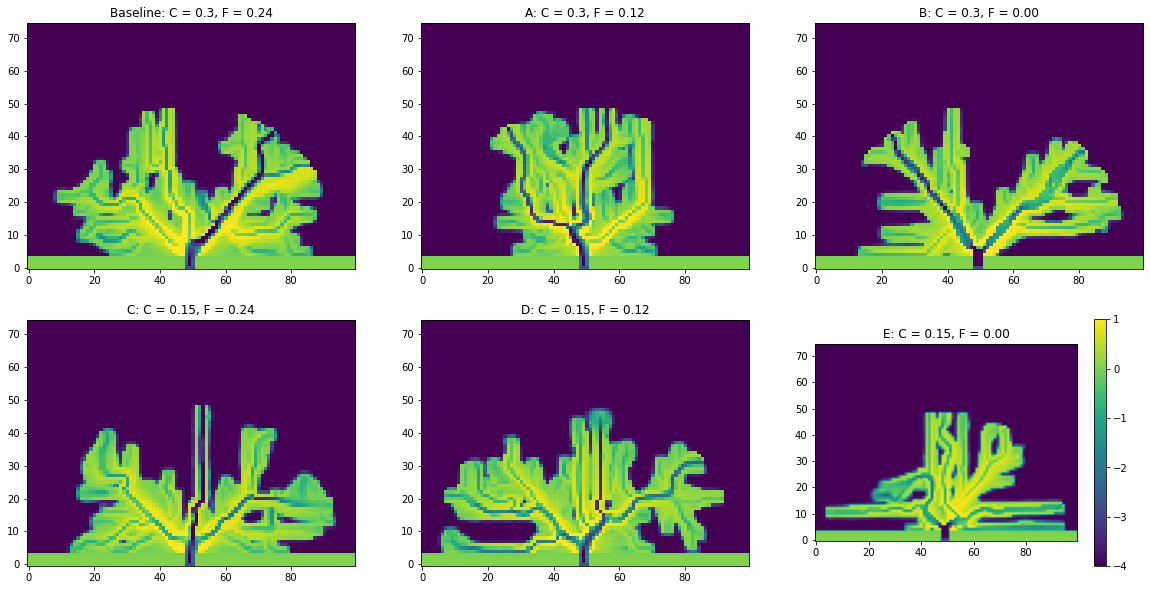

In [13]:
#visualize results
plt.figure(figsize = (20,10))

#subplot the number of days above bankful water discharge
vmin=-4
vmax=1
plt.subplot(2,3,1)
plt.imshow(LV_eta[676,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('Baseline: C = 0.3, F = 0.24')
plt.subplot(2,3,2)
plt.imshow(JD_eta[676,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('A: C = 0.3, F = 0.12')
plt.subplot(2,3,3)
plt.imshow(JA_eta[676,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('B: C = 0.3, F = 0.00')
plt.subplot(2,3,4)
plt.imshow(Extra_eta[592,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('C: C = 0.15, F = 0.24')
plt.subplot(2,3,5)
plt.imshow(KT_eta[592,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('D: C = 0.15, F = 0.12')
plt.subplot(2,3,6)
plt.imshow(TD_eta[592,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('E: C = 0.15, F = 0.00')
plt.colorbar();

In [14]:
print ('max elevation buildup in Baseline:',np.max(LV_eta[676,:,:]))
print ('max elevation buildup in A:',np.max(JD_eta[676,:,:]))

max elevation buildup in Baseline: 1.1282059
max elevation buildup in A: 1.181796


### <font color=purple>__Let's make some observations!__</font> 

__Land Gain__

* Make a histogram representation of the final land gain of each delta for elevations above 1 meter

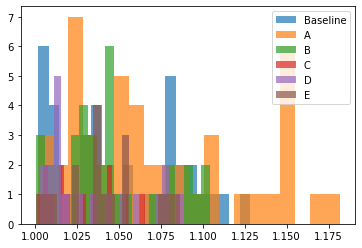

In [15]:
LV_land = LV_eta[676,:,:]
JD_land = JD_eta[676,:,:]
JA_land = JA_eta[676,:,:]
Extra_land = Extra_eta[592,:,:]
KT_land = KT_eta[592,:,:]
TD_land = TD_eta[592,:,:]

plt.hist(LV_land[LV_land>1], bins=20, alpha=0.7, label='Baseline')
plt.hist(JD_land[JD_land>1], bins=20, alpha=0.7, label='A')
plt.hist(JA_land[JA_land>1], bins=20, alpha=0.7, label='B')
plt.hist(Extra_land[Extra_land>1], bins=20, alpha=0.7, label='C')
plt.hist(KT_land[KT_land>1], bins=20, alpha=0.7, label='D')
plt.hist(TD_land[TD_land>1], bins=20, alpha=0.7, label='E')
plt.legend(loc='best');

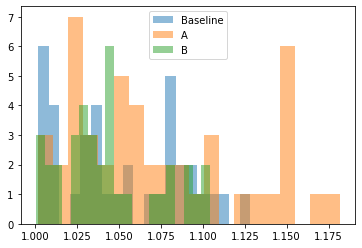

In [16]:
plt.hist(LV_land[LV_land>1], bins=20, alpha=0.5, label='Baseline')
plt.hist(JD_land[JD_land>1], bins=20, alpha=0.5, label='A')
plt.hist(JA_land[JA_land>1], bins=20, alpha=0.5, label='B')
plt.legend(loc='best');

<details>
<summary><b>(Click here for solution)</b></summary>
LV_land = LV_eta[676,:,:]
JD_land = JD_eta[676,:,:]
JA_land = JA_eta[676,:,:]
Extra_land = Extra_eta[592,:,:]
KT_land = KT_eta[592,:,:]
TD_land = TD_eta[592,:,:]

plt.hist(LV_land[LV_land>1], bins=40, alpha=0.7, label='Baseline')
plt.hist(JD_land[JD_land>1], bins=40, alpha=0.7, label='A')
plt.hist(JA_land[JA_land>1], bins=40, alpha=0.7, label='B')
plt.hist(Extra_land[Extra_land>1], bins=40, alpha=0.7, label='C')
plt.hist(KT_land[KT_land>1], bins=40, alpha=0.7, label='D')
plt.hist(TD_land[TD_land>1], bins=40, alpha=0.7, label='E')
plt.legend(loc='best');
</details>

__Flow Velocity__
* Visually, how many bifurcating channels are in each case scenario? 
* We can quantitatively assess this through retrieving the 'velocity' results, which depicts the network of flow velocity
    * <font color=blue>Remember that we are seeing snapshots in time, and results will vary depending on the time slice you select</font>
    * In this case, select the final timestep 

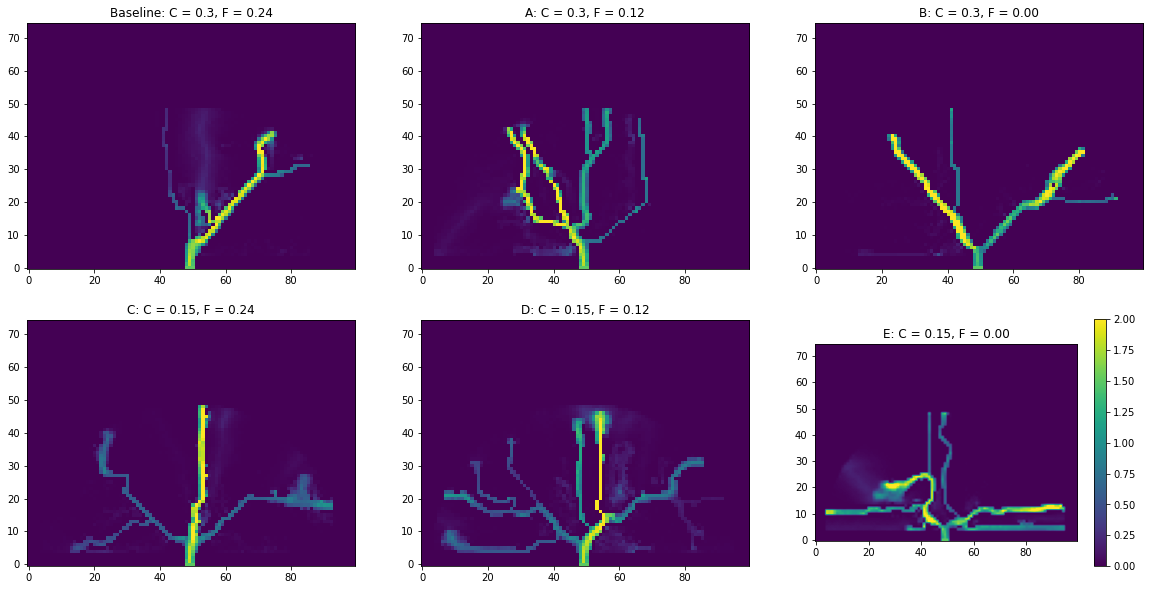

In [17]:
#plot velocity of final snapshot
plt.figure(figsize = (20,10))

#subplot the number of days above bankful water discharge
vmin=0
vmax=2
plt.subplot(2,3,1)
plt.imshow(LV_velocity[676,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('Baseline: C = 0.3, F = 0.24')
plt.subplot(2,3,2)
plt.imshow(JD_velocity[676,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('A: C = 0.3, F = 0.12')
plt.subplot(2,3,3)
plt.imshow(JA_velocity[676,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('B: C = 0.3, F = 0.00')
plt.subplot(2,3,4)
plt.imshow(Extra_velocity[592,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('C: C = 0.15, F = 0.24')
plt.subplot(2,3,5)
plt.imshow(KT_velocity[592,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('D: C = 0.15, F = 0.12')
plt.subplot(2,3,6)
plt.imshow(TD_velocity[592,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('E: C = 0.15, F = 0.00')
plt.colorbar();

<details>
<summary><b>(Click here for solution)</b></summary>
    
#plot velocity of final snapshot
plt.figure(figsize = (20,10))

#subplot the number of days above bankful water discharge
vmin=0
vmax=2
plt.subplot(2,3,1)
plt.imshow(LV_velocity[676,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('Baseline: C = 0.3, F = 0.24')
plt.subplot(2,3,2)
plt.imshow(JD_velocity[676,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('A: C = 0.3, F = 0.12')
plt.subplot(2,3,3)
plt.imshow(JA_velocity[676,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('B: C = 0.3, F = 0.00')
plt.subplot(2,3,4)
plt.imshow(Extra_velocity[592,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('C: C = 0.15, F = 0.24')
plt.subplot(2,3,5)
plt.imshow(KT_velocity[592,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('D: C = 0.15, F = 0.12')
plt.subplot(2,3,6)
plt.imshow(TD_velocity[592,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('E: C = 0.15, F = 0.00')
plt.colorbar();
</details>

Repeat the flow velocity analysis for timestep 100. How different is it?

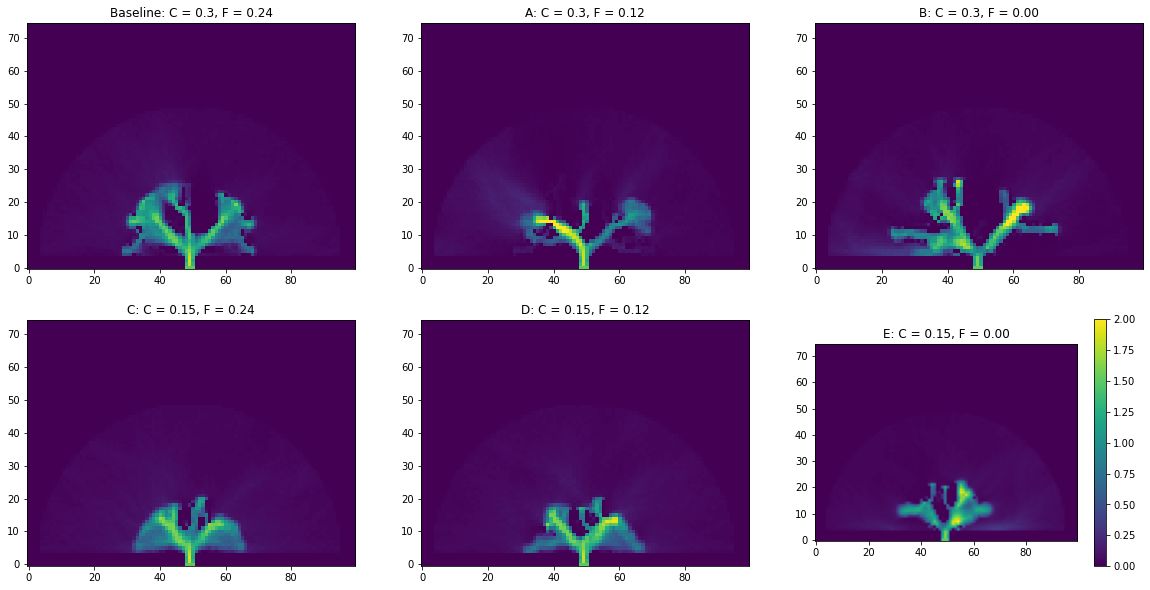

In [18]:
#plot velocity of final snapshot
plt.figure(figsize = (20,10))

#subplot the number of days above bankful water discharge
vmin=0
vmax=2
plt.subplot(2,3,1)
plt.imshow(LV_velocity[100,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('Baseline: C = 0.3, F = 0.24')
plt.subplot(2,3,2)
plt.imshow(JD_velocity[100,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('A: C = 0.3, F = 0.12')
plt.subplot(2,3,3)
plt.imshow(JA_velocity[100,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('B: C = 0.3, F = 0.00')
plt.subplot(2,3,4)
plt.imshow(Extra_velocity[100,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('C: C = 0.15, F = 0.24')
plt.subplot(2,3,5)
plt.imshow(KT_velocity[100,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('D: C = 0.15, F = 0.12')
plt.subplot(2,3,6)
plt.imshow(TD_velocity[100,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('E: C = 0.15, F = 0.00')
plt.colorbar();

<details>
<summary><b>(Click here for solution)</b></summary>
#plot velocity of final snapshot
plt.figure(figsize = (20,10))

#subplot the number of days above bankful water discharge
vmin=0
vmax=2
plt.subplot(2,3,1)
plt.imshow(LV_velocity[100,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('Baseline: C = 0.3, F = 0.24')
plt.subplot(2,3,2)
plt.imshow(JD_velocity[100,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('A: C = 0.3, F = 0.12')
plt.subplot(2,3,3)
plt.imshow(JA_velocity[100,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('B: C = 0.3, F = 0.00')
plt.subplot(2,3,4)
plt.imshow(Extra_velocity[100,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('C: C = 0.15, F = 0.24')
plt.subplot(2,3,5)
plt.imshow(KT_velocity[100,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('D: C = 0.15, F = 0.12')
plt.subplot(2,3,6)
plt.imshow(TD_velocity[100,:,:], origin='lower',vmin=vmin,vmax=vmax)
plt.title('E: C = 0.15, F = 0.00')
plt.colorbar();
</details>

__Subsidence__

In each of the previous cases, we saw how delta morphology changes according to upstream (dam) modifications to the sand/mud fraction feeding the delta. Let’s consider changes in basin parameters, such as subsidence!

Modify the original __.YAML__ configuration file to incorporate subsidence (you can visit [this link]( https://deltarcm.org/pyDeltaRCM/guides/user_guide.html#running-the-model) to add the appropriate model parameter)

## Part 3: General Discussion

[Mississippi Watershed extent](https://earthlymission.com/mississippi-river-basin-watershed-size-animation-nasa-satellite-map/)
<figure>
<center>
  <img width="600" height="400" src="watershed.jpeg">
</center>
<figcaption align = "center"><b></b></figcaption>
<figure>

We have explored some of the upstream parameters of a single dam that can significantly modify the Wax Lake delta’s morphology. In reality, dams have a cascading effect along the entire Mississippi River watershed, where resources are extracted among multiple states. Along with water discharge, sediment can be captured and restricted upstream. 

Additionally, the Louisiana Coast is managed by the Coastal Protection and Restoration Authority. Management efforts are compiled into a Master Plan, which can be visited through [this link](http://coastal.la.gov/wp-content/uploads/2017/04/2017-Coastal-Master-Plan_Web-Book_CFinal-with-Effective-Date-06092017.pdf). The Louisiana Coast is facing serious land-loss threats, particularly from increasing storm surges and sea-level rise. These models are handy when targeting such projects while implementing dam regulations that balance necessary water and sediment proportions.

# Summary

In this lab, we have explored the impacts of dams on downstream delta dynamics. As a result, we analyzed:
* Assessing hydrograph data of a system from USGS flow gauges through utilizing the dataretrieval python package
* Calculating the Intermittency Factor (IF) of a system 
* Running different models based realistic damming parameters